In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def filter_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Filter by
    - Require IVF_before_hr_24_no_L_cutoff >= 0.25 (i.e., 250 ml of IVF in first 24 hrs)
    - Exclude isolated head injuries (i.e., Head AIS >= 3 and all other AIS <= 1)
    :param df: compiled patient dataframe
    :return: filtered patient dataframe
    """
    max_ais_col_name = 'MaxNonHeadAIS'
    df[max_ais_col_name] = df[['MaxHeadAIS', 'MaxChestAIS', 'MaxAbdAIS', 'MaxSpineAIS', 'MaxLEAIS', 'MaxUEAIS', 'MaxFaceAIS', 'MaxNeckAIS']].max(axis=1)
    # mask = ((df['IVF_before_hr_24_no_L_cutoff'] > 0.25) | np.isclose(df['IVF_before_hr_24_no_L_cutoff'], 0.25)) & ((df['MaxHeadAIS'] < 3) | (df[max_ais_col_name] > 1)) & (df['TraumaType'].str.strip().str.lower().isin({'b', 'p'})) & ((df['InitLactate'] >= 2.0) | np.isclose(df['InitLactate'], 2.0))
    mask = (df['InitLactate'] >= 2.0) | np.isclose(df['InitLactate'], 2.0)
    filtered_data = df[mask]
    df.drop(columns=[max_ais_col_name], inplace=True)
    return filtered_data

In [3]:
# Load the data
compiled_patient_data_2012_2015 = pd.read_csv('<path_to_dataset>/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')
orig_num_patients = compiled_patient_data_2012_2015.shape[0]
compiled_patient_data_2012_2015 = filter_data(compiled_patient_data_2012_2015)
print(f'Original number of patients: {orig_num_patients} Filtered number of patients: {compiled_patient_data_2012_2015.shape[0]} Number of patients removed: {orig_num_patients - compiled_patient_data_2012_2015.shape[0]}')
compiled_patient_data_2012_2015.head()

Original number of patients: 4746 Filtered number of patients: 1923 Number of patients removed: 2823


/var/folders/vf/695131157rl2pvb9_s5zykbh0000gn/T/ipykernel_55698/4165698819.py:2: DtypeWarning: Columns (1,2,133) have mixed types. Specify dtype option on import or set low_memory=False.
  compiled_patient_data_2012_2015 = pd.read_csv('/Users/larry/Documents/UWT/Thesis Work/rec_sys/datasets/trauma_icu_resuscitation/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')


,StudyID,Height,Weight,BMI,Age,Sex,Male,CHF,COPD,HTN,...,Hours_to_death_from_admit,Death_after_48_hrs,Death_by_3_hrs,Death_by_24_hrs,Death_by_48_hrs,EarlyBolus_NEW,Num_0.5L_boluses_after_hr_6_before_hr_48_no_L_cutoff,LateBolus_NEW,EarlyLateBolus_NEW,MaxNonHeadAIS
1,18608,175.3,79.5,26.0,86,M,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,1,2.0,1,3,0
3,19690,165.0,43.6,16.0,64,M,1,0,0,0,...,186.77,1.0,0.0,0.0,0.0,1,0.0,0,1,5
4,20636,185.0,85.0,25.0,45,M,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,3
6,20214,177.0,105.0,33.0,67,M,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,3
7,17673,174.0,102.0,34.0,42,M,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,1,0.0,0,1,0


In [4]:
compiled_patient_data_2016_2019 = pd.read_csv('<path_to_dataset>/2016-2019_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')
compiled_patient_data_2016_2019['StudyID'] = compiled_patient_data_2016_2019['StudyID'].astype(int)
orig_num_patients = compiled_patient_data_2016_2019.shape[0]
compiled_patient_data_2016_2019 = filter_data(compiled_patient_data_2016_2019)
print(f'Original number of patients: {orig_num_patients} Filtered number of patients: {compiled_patient_data_2016_2019.shape[0]} Number of patients removed: {orig_num_patients - compiled_patient_data_2016_2019.shape[0]}')
compiled_patient_data_2016_2019.head()

Original number of patients: 6201 Filtered number of patients: 2382 Number of patients removed: 3819


,StudyID,AdmitDtTm,Height,Weight,BMI,Age,Sex,Male,CHF,COPD,...,Hours_to_death_from_admit,Death_after_48_hrs,Death_by_3_hrs,Death_by_24_hrs,Death_by_48_hrs,EarlyBolus_NEW,Num_0.5L_boluses_after_hr_6_before_hr_48_no_L_cutoff,LateBolus_NEW,EarlyLateBolus_NEW,MaxNonHeadAIS
3,8,2016-01-01 19:38:00,177,75,24.0,68,M,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,12.0,1,3,4
9,18,2016-01-03 23:57:00,170,78,27.0,34,F,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,2
11,21,2016-01-04 11:42:00,185,80,23.0,54,M,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,2.0,1,3,3
15,29,2016-01-05 10:34:00,184,74,22.0,24,M,1,0,0,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,4
16,30,2016-01-05 12:28:00,170,48,17.0,21,M,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,8.0,1,3,4


In [5]:
print([s for s in compiled_patient_data_2012_2015.columns if 'ICU' in s and 'lactate' in s.lower()])

['Hours_from_ICU_to_lactate2', 'Hours_from_initial_lactate_to_ICU', 'lactate_value_ICU', 'lactate_DtTm_ICU', 'lactate_hrs_btwn_ICU', 'lactate_value_ICU_48', 'lactate_DtTm_ICU_48', 'lactate_hrs_btwn_ICU_48']


In [6]:
print([s for s in compiled_patient_data_2016_2019.columns if 'ICU' in s and 'lactate' in s.lower()])

['Hours_from_ICU_to_lactate2', 'Hours_from_initial_lactate_to_ICU', 'lactate_value_ICU', 'lactate_DtTm_ICU', 'lactate_hrs_btwn_ICU', 'lactate_value_ICU_48', 'lactate_DtTm_ICU_48', 'lactate_hrs_btwn_ICU_48']


count    4305.000000
mean        3.346132
std         2.220582
min         0.500000
25%         2.100000
50%         2.900000
75%         3.900000
max        29.000000
Name: lactate_value_ICU, dtype: float64


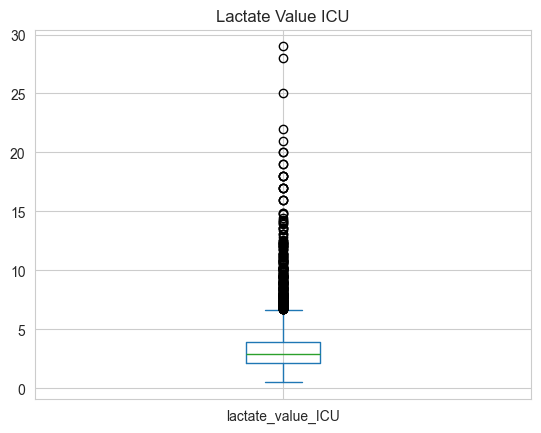

In [7]:
t = pd.concat([compiled_patient_data_2012_2015['lactate_value_ICU'], compiled_patient_data_2016_2019['lactate_value_ICU']])
print(t.describe())
ax = t.plot.box()
ax.set_title('Lactate Value ICU')
del t

In [8]:
compiled_patient_data_2016_2019[compiled_patient_data_2016_2019['StudyID'] == 1600]

,StudyID,AdmitDtTm,Height,Weight,BMI,Age,Sex,Male,CHF,COPD,...,Hours_to_death_from_admit,Death_after_48_hrs,Death_by_3_hrs,Death_by_24_hrs,Death_by_48_hrs,EarlyBolus_NEW,Num_0.5L_boluses_after_hr_6_before_hr_48_no_L_cutoff,LateBolus_NEW,EarlyLateBolus_NEW,MaxNonHeadAIS


In [9]:
compiled_patient_data_2016_2019[compiled_patient_data_2016_2019['BMI'] > 300]['Height']

3486    78
Name: Height, dtype: object

In [10]:
compiled_patient_data_2012_2015['Weight'] = pd.to_numeric(compiled_patient_data_2012_2015['Weight'], errors='coerce')
compiled_patient_data_2012_2015[compiled_patient_data_2012_2015['Weight'] < 9.0]['Age']

3898    33
Name: Age, dtype: int64

<Axes: >

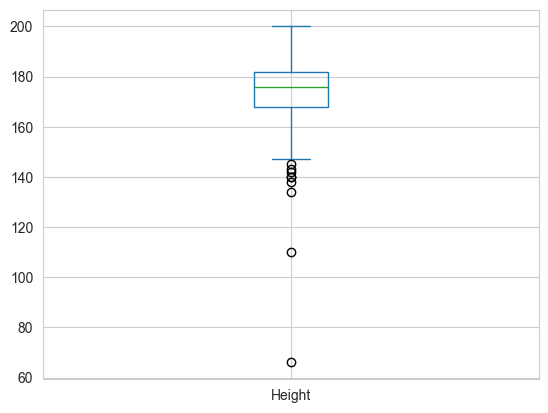

In [11]:
compiled_patient_data_2012_2015['Height'] = pd.to_numeric(compiled_patient_data_2012_2015['Height'], errors='coerce')
compiled_patient_data_2012_2015['Height'].plot.box()

<Axes: >

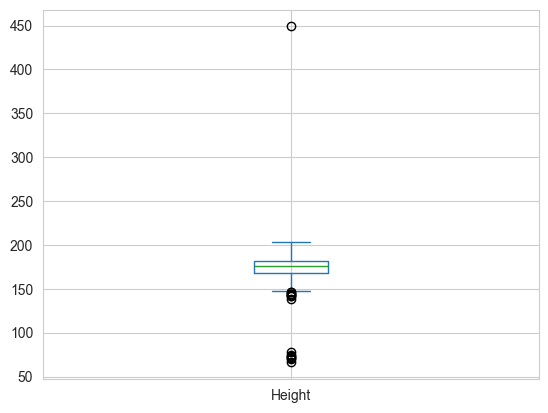

In [12]:
compiled_patient_data_2016_2019['Height'] = pd.to_numeric(compiled_patient_data_2016_2019['Height'], errors='coerce')
compiled_patient_data_2016_2019['Height'].plot.box()

<Axes: >

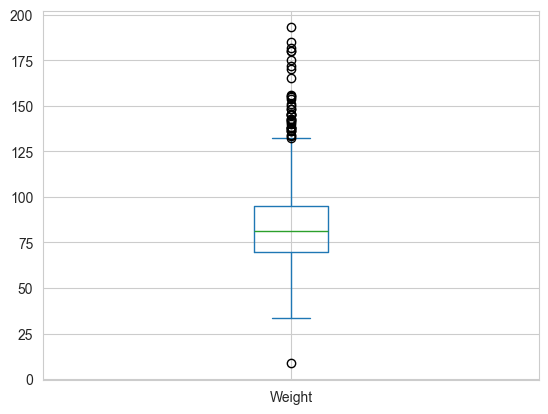

In [13]:
compiled_patient_data_2012_2015['Weight'] = pd.to_numeric(compiled_patient_data_2012_2015['Weight'], errors='coerce')
compiled_patient_data_2012_2015['Weight'].plot.box()

<Axes: >

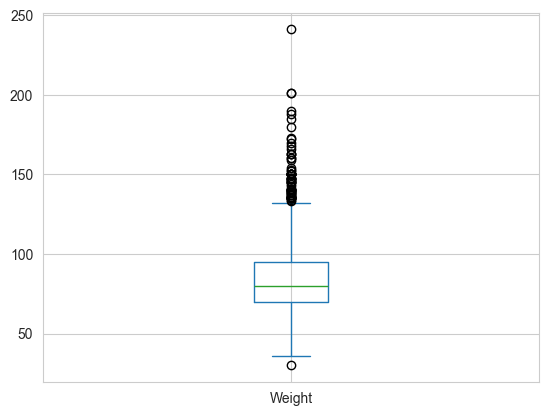

In [14]:
compiled_patient_data_2016_2019['Weight'] = pd.to_numeric(compiled_patient_data_2016_2019['Weight'], errors='coerce')
compiled_patient_data_2016_2019['Weight'].plot.box()

In [15]:
#compiled_patient_data_2016_2019# 2012-2015
filtered_patient_data_2012_2015 = compiled_patient_data_2012_2015
filter_columns = ['StudyID', 'AdmitDtTm', 'BMI', 'Age', 'Sex', 'Obesity', 'Diabetes', 'Smoker', 'Transfer', 'RBC_pre_ICU', 'FFP_pre_ICU', 
                  'PLT_pre_ICU', 'Weight', 'Height',
                  'TraumaType', 'MaxHeadAIS', 'MaxChestAIS', 'MaxAbdAIS', 'MaxSpineAIS', 'MaxLEAIS',
                  'InitLactate', 'InitLactateDtTm', 'ICU_AdmitDtTm', 'lactate_value_ICU',
                  'Deceased', 'CauseOfDeath', 'VentFreeDays']
rename_columns = {}
filtered_patient_data_2012_2015 = filtered_patient_data_2012_2015[filter_columns]
filtered_patient_data_2012_2015 = filtered_patient_data_2012_2015.rename(columns=rename_columns)
filtered_patient_data_2012_2015.head()

,StudyID,AdmitDtTm,BMI,Age,Sex,Obesity,Diabetes,Smoker,Transfer,RBC_pre_ICU,...,MaxAbdAIS,MaxSpineAIS,MaxLEAIS,InitLactate,InitLactateDtTm,ICU_AdmitDtTm,lactate_value_ICU,Deceased,CauseOfDeath,VentFreeDays
1,18608,2013-01-21 13:22:00,26.0,86,M,0,0,0,0,1.0,...,0,0,0,9.4,2013-01-21 13:50:00,2013-01-21 15:46:00,9.4,0,NaN,28
3,19690,2013-06-26 16:20:00,16.0,64,M,0,0,1,0,3.0,...,0,0,3,2.6,2013-06-26 18:11:00,2013-06-26 20:44:00,2.8,1,"Resp failure, 2/2/TBI",0
4,20636,2013-10-30 12:17:00,25.0,45,M,0,0,0,0,0.0,...,3,0,0,3.1,2013-10-30 12:15:00,2013-10-30 13:47:00,1.7,0,NaN,26
6,20214,2013-08-28 10:49:00,33.0,67,M,0,0,0,0,0.0,...,0,0,0,2.9,2013-08-28 10:58:00,2013-08-28 16:17:00,2.9,0,NaN,28
7,17673,2012-08-28 21:23:00,34.0,42,M,1,1,0,0,0.0,...,0,0,0,3.0,2012-08-28 21:59:00,2012-08-29 02:04:00,2.5,0,NaN,26


In [16]:
# 2016-2019
filtered_patient_data_2016_2019 = compiled_patient_data_2016_2019
filter_columns = ['StudyID', 'AdmitDtTm', 'BMI', 'Age', 'Sex', 'Obesity', 'Diabetes', 'Smoker', 'Transfer', 'RBC_pre_ICU', 'FFP_pre_ICU', 
                  'PLT_pre_ICU', 'Weight', 'Height',
                  'TraumaType', 'MaxHeadAIS', 'MaxChestAIS', 'MaxAbdAIS', 'MaxSpineAIS', 'MaxLEAIS',
                  'InitLactate', 'InitLactateDtTm', 'ICU_AdmitDtTm', 'lactate_value_ICU',
                  'Deceased', 'CauseOfDeath', 'VentFreeDays']
rename_columns = {} #{'Pregancy': 'Pregnancy'}
filtered_patient_data_2016_2019 = filtered_patient_data_2016_2019[filter_columns]
filtered_patient_data_2016_2019 = filtered_patient_data_2016_2019.rename(columns=rename_columns)
filtered_patient_data_2016_2019.head()

,StudyID,AdmitDtTm,BMI,Age,Sex,Obesity,Diabetes,Smoker,Transfer,RBC_pre_ICU,...,MaxAbdAIS,MaxSpineAIS,MaxLEAIS,InitLactate,InitLactateDtTm,ICU_AdmitDtTm,lactate_value_ICU,Deceased,CauseOfDeath,VentFreeDays
3,8,2016-01-01 19:38:00,24.0,68,M,0,0,1,1,0.0,...,4,2,3,3.2,2016-01-01 19:50:00,2016-01-01 22:09:00,2.8,0,NaN,0.0
9,18,2016-01-03 23:57:00,27.0,34,F,0,0,1,1,0.0,...,2,2,2,2.3,2016-01-04 00:11:00,2016-01-04 02:42:00,1.1,0,NaN,26.0
11,21,2016-01-04 11:42:00,23.0,54,M,0,0,0,0,0.0,...,2,0,0,3.5,2016-01-04 12:56:00,2016-01-04 17:40:00,3.5,0,NaN,26.0
15,29,2016-01-05 10:34:00,22.0,24,M,0,0,0,0,0.0,...,0,0,2,2.4,2016-01-05 10:40:00,2016-01-05 21:26:00,1.8,0,NaN,28.0
16,30,2016-01-05 12:28:00,17.0,21,M,0,0,0,0,7.0,...,0,0,0,4.7,2016-01-05 12:24:00,2016-01-05 16:17:00,3.0,0,NaN,26.0


In [17]:
# join the two datasets
filtered_patient_data = pd.concat([filtered_patient_data_2012_2015, filtered_patient_data_2016_2019])
filtered_patient_data['Height'] = pd.to_numeric(filtered_patient_data['Height'], errors='coerce')
filtered_patient_data['Weight'] = pd.to_numeric(filtered_patient_data['Weight'], errors='coerce')
# filtered_patient_data['Race'] = filtered_patient_data['Race'].apply(str.strip)
# filtered_patient_data['InjuryMechanism'] = filtered_patient_data['InjuryMechanism'].apply(str.strip)
# filtered_patient_data['Complications'] = filtered_patient_data['Complications'].apply(str.strip)
#filtered_patient_data['CauseOfDeath'] = filtered_patient_data['CauseOfDeath'].apply(str.strip)
filtered_patient_data.shape

(4305, 27)

In [18]:
filtered_patient_data.head()

,StudyID,AdmitDtTm,BMI,Age,Sex,Obesity,Diabetes,Smoker,Transfer,RBC_pre_ICU,...,MaxAbdAIS,MaxSpineAIS,MaxLEAIS,InitLactate,InitLactateDtTm,ICU_AdmitDtTm,lactate_value_ICU,Deceased,CauseOfDeath,VentFreeDays
1,18608,2013-01-21 13:22:00,26.0,86,M,0,0,0,0,1.0,...,0,0,0,9.4,2013-01-21 13:50:00,2013-01-21 15:46:00,9.4,0,NaN,28.0
3,19690,2013-06-26 16:20:00,16.0,64,M,0,0,1,0,3.0,...,0,0,3,2.6,2013-06-26 18:11:00,2013-06-26 20:44:00,2.8,1,"Resp failure, 2/2/TBI",0.0
4,20636,2013-10-30 12:17:00,25.0,45,M,0,0,0,0,0.0,...,3,0,0,3.1,2013-10-30 12:15:00,2013-10-30 13:47:00,1.7,0,NaN,26.0
6,20214,2013-08-28 10:49:00,33.0,67,M,0,0,0,0,0.0,...,0,0,0,2.9,2013-08-28 10:58:00,2013-08-28 16:17:00,2.9,0,NaN,28.0
7,17673,2012-08-28 21:23:00,34.0,42,M,1,1,0,0,0.0,...,0,0,0,3.0,2012-08-28 21:59:00,2012-08-29 02:04:00,2.5,0,NaN,26.0


In [19]:
filtered_patient_data.dtypes

StudyID                int64
AdmitDtTm             object
BMI                  float64
Age                    int64
Sex                   object
Obesity                int64
Diabetes               int64
Smoker                 int64
Transfer               int64
RBC_pre_ICU          float64
FFP_pre_ICU          float64
PLT_pre_ICU          float64
Weight               float64
Height               float64
TraumaType            object
MaxHeadAIS             int64
MaxChestAIS            int64
MaxAbdAIS              int64
MaxSpineAIS            int64
MaxLEAIS               int64
InitLactate          float64
InitLactateDtTm       object
ICU_AdmitDtTm         object
lactate_value_ICU    float64
Deceased               int64
CauseOfDeath          object
VentFreeDays         float64
dtype: object

In [20]:
filtered_patient_data['StudyID'].nunique()

4305

In [21]:
numeric_cols = {'BMI', 'Weight', 'Height', 'Age', 'InitLactate', 'RBC_pre_ICU', 'FFP_pre_ICU', 'PLT_pre_ICU', 'lactate_value_ICU', 'VentFreeDays'}
binary_cols = {'Obesity', 'Diabetes', 'Smoker', 'Transfer', 'Deceased'}
cat_cols = {'Sex', 'TraumaType', 'CauseOfDeath', 'MaxHeadAIS', 'MaxChestAIS', 'MaxAbdAIS', 'MaxSpineAIS', 'MaxLEAIS'}

In [22]:
print('Numeric Columns')
for col in numeric_cols:
    print(f'{col}: {filtered_patient_data[col].mean():.5f} +/- {filtered_patient_data[col].std():.5f} NaN: {filtered_patient_data[col].isna().sum()}')
print('\nBinary Columns')
for col in binary_cols:
    print(f'{col}: 0: {(filtered_patient_data[col] == 0).sum()} 1: {(filtered_patient_data[col] == 1).sum()} NaN: {filtered_patient_data[col].isna().sum()}')
print('\nCategorical Columns')
for col in cat_cols:
    print(f'{col}: {filtered_patient_data[col].value_counts()}')
    print(f'{col} NaN: {filtered_patient_data[col].isna().sum()}')

Numeric Columns
PLT_pre_ICU: 0.29773 +/- 0.87628 NaN: 0
VentFreeDays: 21.29268 +/- 9.66958 NaN: 0
lactate_value_ICU: 3.34613 +/- 2.22058 NaN: 0
FFP_pre_ICU: 1.80187 +/- 5.17364 NaN: 0
InitLactate: 4.42718 +/- 3.07667 NaN: 0
Height: 174.70794 +/- 11.79490 NaN: 250
BMI: 27.74157 +/- 10.37944 NaN: 273
RBC_pre_ICU: 2.09946 +/- 5.17076 NaN: 0
Weight: 84.02533 +/- 20.77139 NaN: 129
Age: 44.55238 +/- 18.74679 NaN: 0

Binary Columns
Deceased: 0: 3778 1: 527 NaN: 0
Diabetes: 0: 3949 1: 356 NaN: 0
Obesity: 0: 3445 1: 860 NaN: 0
Smoker: 0: 3482 1: 823 NaN: 0
Transfer: 0: 2998 1: 1307 NaN: 0

Categorical Columns
MaxLEAIS: MaxLEAIS
0    2382
3     714
2     468
4     366
5     365
1      10
Name: count, dtype: int64
MaxLEAIS NaN: 0
CauseOfDeath: CauseOfDeath
TBI                                   82
resp failure                          51
SDH                                   27
Anoxic Brain Injury                    9
Resp failure                           8
                                      .

In [23]:
# now do it by deceased
print('Numeric Columns')
died_mask = filtered_patient_data.Deceased == 1
lived_mask = ~died_mask
for col in numeric_cols:
    for mask, mask_lbl in ((died_mask, 'died'), (lived_mask, 'lived')):
        print(f'{mask_lbl} {col}: {filtered_patient_data.loc[mask, col].mean():.5f} +/- {filtered_patient_data.loc[mask, col].std():.5f} NaN: {filtered_patient_data.loc[mask, col].isna().sum()}')
print('\nBinary Columns')
for col in binary_cols:
    for mask, mask_lbl in ((died_mask, 'died'), (lived_mask, 'lived')):
        print(f'{mask_lbl} {col}: 0: {(filtered_patient_data.loc[mask, col] == 0).sum()} 1: {(filtered_patient_data.loc[mask, col] == 1).sum()} NaN: {filtered_patient_data.loc[mask, col].isna().sum()}')
print('\nCategorical Columns')
for col in cat_cols:
    for mask, mask_lbl in ((died_mask, 'died'), (lived_mask, 'lived')):
        print(f'{mask_lbl} {col}: {filtered_patient_data.loc[mask, col].value_counts()}')
        print(f'{mask_lbl} {col} NaN: {filtered_patient_data.loc[mask, col].isna().sum()}')

Numeric Columns
died PLT_pre_ICU: 0.76915 +/- 1.39482 NaN: 0
lived PLT_pre_ICU: 0.23197 +/- 0.75414 NaN: 0
died VentFreeDays: 0.00000 +/- 0.00000 NaN: 0
lived VentFreeDays: 24.26284 +/- 5.87055 NaN: 0
died lactate_value_ICU: 5.17495 +/- 3.90436 NaN: 0
lived lactate_value_ICU: 3.09103 +/- 1.72171 NaN: 0
died FFP_pre_ICU: 4.82855 +/- 9.88779 NaN: 0
lived FFP_pre_ICU: 1.37967 +/- 3.92800 NaN: 0
died InitLactate: 6.20797 +/- 4.41456 NaN: 0
lived InitLactate: 4.17877 +/- 2.75108 NaN: 0
died Height: 174.33304 +/- 17.11942 NaN: 70
lived Height: 174.75556 +/- 10.93714 NaN: 180
died BMI: 27.44615 +/- 7.68465 NaN: 72
lived BMI: 27.77914 +/- 10.67382 NaN: 201
died RBC_pre_ICU: 4.91474 +/- 9.47599 NaN: 0
lived RBC_pre_ICU: 1.70675 +/- 4.08682 NaN: 0
died Weight: 82.25335 +/- 21.22976 NaN: 34
lived Weight: 84.26252 +/- 20.70069 NaN: 95
died Age: 55.91841 +/- 21.83709 NaN: 0
lived Age: 42.96691 +/- 17.70676 NaN: 0

Binary Columns
died Deceased: 0: 0 1: 527 NaN: 0
lived Deceased: 0: 3778 1: 0 NaN: 0


In [24]:
# load raw data, filter columns, combine, plot stats by deceased 
# Load the data
raw_patient_data_2012_2015 = pd.read_csv('<path_to_dataset>/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')
raw_patient_data_2016_2019 = pd.read_csv('<path_to_dataset>/2016-2019_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')
filter_columns = ['StudyID', 'AdmitDtTm', 'BMI', 'Age', 'Sex', 'Obesity', 'Diabetes', 'Smoker', 'Transfer', 'RBC_pre_ICU', 'FFP_pre_ICU', 
                  'PLT_pre_ICU', 'Weight', 'Height',
                  'TraumaType', 'MaxHeadAIS', 'MaxChestAIS', 'MaxAbdAIS', 'MaxSpineAIS', 'MaxLEAIS',
                  'InitLactate', 'InitLactateDtTm', 'ICU_AdmitDtTm', 'lactate_value_ICU',
                  'Deceased', 'CauseOfDeath']
rename_columns = {}
raw_patient_data_2016_2019 = raw_patient_data_2016_2019[filter_columns]
raw_patient_data_2016_2019 = raw_patient_data_2016_2019.rename(columns=rename_columns)
raw_patient_data_2016_2019['StudyID'] = raw_patient_data_2016_2019['StudyID'].astype(int)
filter_columns = ['StudyID', 'AdmitDtTm', 'BMI', 'Age', 'Sex', 'Obesity', 'Diabetes', 'Smoker', 'Transfer', 'RBC_pre_ICU', 'FFP_pre_ICU', 
                  'PLT_pre_ICU', 'Weight', 'Height',
                  'TraumaType', 'MaxHeadAIS', 'MaxChestAIS', 'MaxAbdAIS', 'MaxSpineAIS', 'MaxLEAIS',
                  'InitLactate', 'InitLactateDtTm', 'ICU_AdmitDtTm', 'lactate_value_ICU',
                  'Deceased', 'CauseOfDeath']
rename_columns = {} #{'Pregancy': 'Pregnancy'}
raw_patient_data_2016_2019 = raw_patient_data_2016_2019[filter_columns]
raw_patient_data_2016_2019 = raw_patient_data_2016_2019.rename(columns=rename_columns)
raw_patient_data = pd.concat([raw_patient_data_2012_2015, raw_patient_data_2016_2019])
raw_patient_data['Height'] = pd.to_numeric(raw_patient_data['Height'], errors='coerce')
raw_patient_data['Weight'] = pd.to_numeric(raw_patient_data['Weight'], errors='coerce')
print('Numeric Columns')
died_mask = raw_patient_data.Deceased == 1
lived_mask = ~died_mask
for col in numeric_cols:
    for mask, mask_lbl in ((died_mask, 'died'), (lived_mask, 'lived')):
        print(f'{mask_lbl} {col}: {raw_patient_data.loc[mask, col].mean():.5f} +/- {raw_patient_data.loc[mask, col].std():.5f} NaN: {raw_patient_data.loc[mask, col].isna().sum()}')
print('\nBinary Columns')
for col in binary_cols:
    for mask, mask_lbl in ((died_mask, 'died'), (lived_mask, 'lived')):
        print(f'{mask_lbl} {col}: 0: {(raw_patient_data.loc[mask, col] == 0).sum()} 1: {(raw_patient_data.loc[mask, col] == 1).sum()} NaN: {raw_patient_data.loc[mask, col].isna().sum()}')
print('\nCategorical Columns')
for col in cat_cols:
    for mask, mask_lbl in ((died_mask, 'died'), (lived_mask, 'lived')):
        print(f'{mask_lbl} {col}: {raw_patient_data.loc[mask, col].value_counts()}')
        print(f'{mask_lbl} {col} NaN: {raw_patient_data.loc[mask, col].isna().sum()}')

/var/folders/vf/695131157rl2pvb9_s5zykbh0000gn/T/ipykernel_55698/3879219837.py:3: DtypeWarning: Columns (1,2,133) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_patient_data_2012_2015 = pd.read_csv('/Users/larry/Documents/UWT/Thesis Work/rec_sys/datasets/trauma_icu_resuscitation/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')


Numeric Columns
died PLT_pre_ICU: 0.56720 +/- 1.23803 NaN: 0
lived PLT_pre_ICU: 0.11568 +/- 0.53092 NaN: 0
died VentFreeDays: 0.00000 +/- 0.00000 NaN: 491
lived VentFreeDays: 25.91638 +/- 4.48909 NaN: 5710
died lactate_value_ICU: 4.00674 +/- 3.65932 NaN: 38
lived lactate_value_ICU: 2.24673 +/- 1.61316 NaN: 3063
died FFP_pre_ICU: 3.33344 +/- 8.27577 NaN: 0
lived FFP_pre_ICU: 0.61417 +/- 2.59492 NaN: 0
died InitLactate: 4.58270 +/- 4.29955 NaN: 38
lived InitLactate: 2.78510 +/- 2.52244 NaN: 3063
died Height: 172.95388 +/- 16.29605 NaN: 102
lived Height: 173.51342 +/- 11.34739 NaN: 435
died BMI: 27.39638 +/- 10.41881 NaN: 105
lived BMI: 27.32973 +/- 9.23294 NaN: 497
died RBC_pre_ICU: 3.37993 +/- 7.93327 NaN: 0
lived RBC_pre_ICU: 0.80769 +/- 3.01663 NaN: 0
died Weight: 80.60515 +/- 21.64997 NaN: 43
lived Weight: 82.06987 +/- 21.74629 NaN: 277
died Age: 61.47451 +/- 22.02058 NaN: 0
lived Age: 49.72745 +/- 20.44897 NaN: 0

Binary Columns
died Deceased: 0: 0 1: 824 NaN: 0
lived Deceased: 0: 1

In [25]:
raw_patient_data['Age'].describe()

count    10947.000000
mean        50.611674
std         20.802562
min         18.000000
25%         32.000000
50%         50.000000
75%         66.000000
max        104.000000
Name: Age, dtype: float64

In [26]:
def do_hist_plot(df: pd.DataFrame, col_: str):
    ax = df[col_].hist()
    ax.set_title(col_)
    ax.set_xlabel(col_)
    ax.set_ylabel('Count')
    plt.show()

def do_box_plot(df: pd.DataFrame, col_: str):
    print(df[col_].describe())
    ax = df[col_].plot.box()
    # ax.set_title(col_)
    # ax.set_xlabel(col_)
    ax.set_ylabel('Count')
    plt.show()

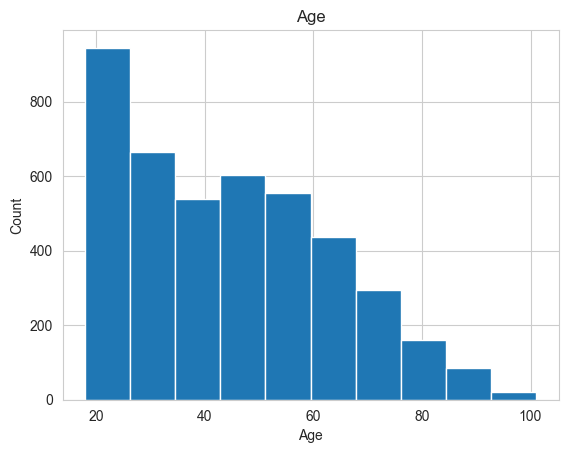

In [27]:
do_hist_plot(filtered_patient_data, 'Age')

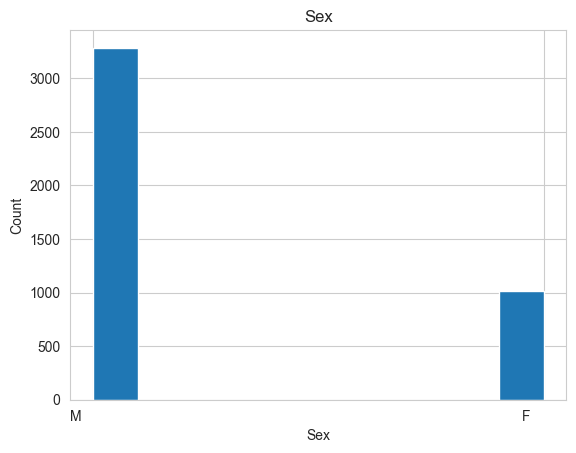

In [28]:
do_hist_plot(filtered_patient_data, 'Sex')

count    4032.000000
mean       27.741567
std        10.379439
min         2.000000
25%        23.000000
50%        26.000000
75%        30.000000
max       303.000000
Name: BMI, dtype: float64


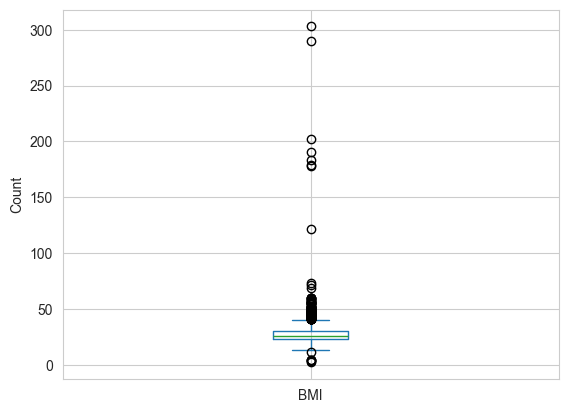

In [29]:
do_box_plot(filtered_patient_data, 'BMI')

count    4176.000000
mean       84.025330
std        20.771393
min         8.600000
25%        70.000000
50%        80.000000
75%        95.000000
max       241.000000
Name: Weight, dtype: float64


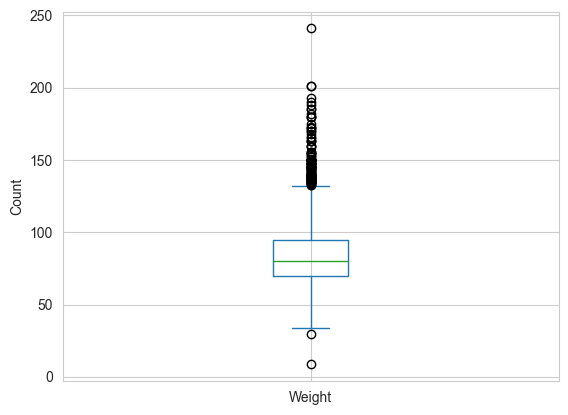

In [30]:
do_box_plot(filtered_patient_data, 'Weight')

count    4055.000000
mean      174.707941
std        11.794901
min        66.000000
25%       168.000000
50%       176.000000
75%       182.000000
max       449.000000
Name: Height, dtype: float64


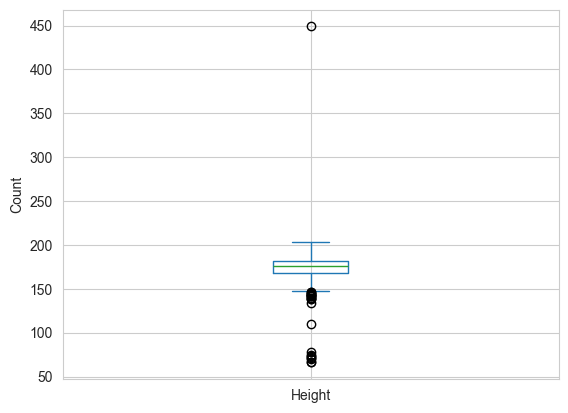

In [31]:
do_box_plot(filtered_patient_data, 'Height')

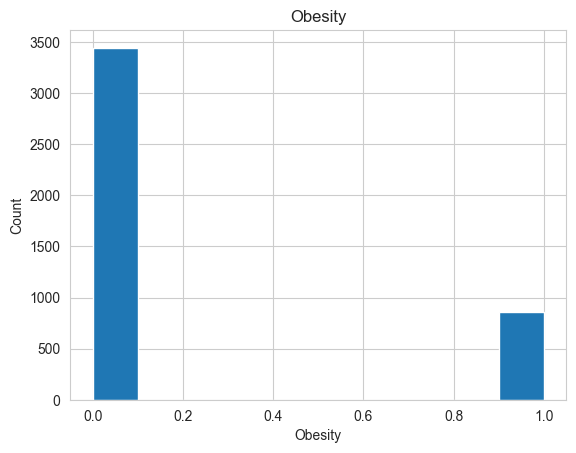

In [32]:
do_hist_plot(filtered_patient_data, 'Obesity')

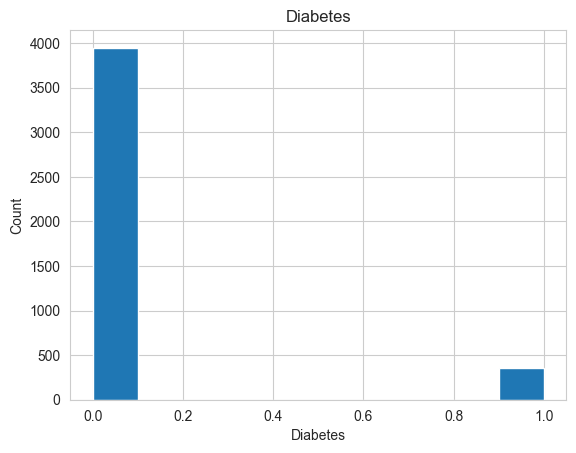

In [33]:
do_hist_plot(filtered_patient_data, 'Diabetes')

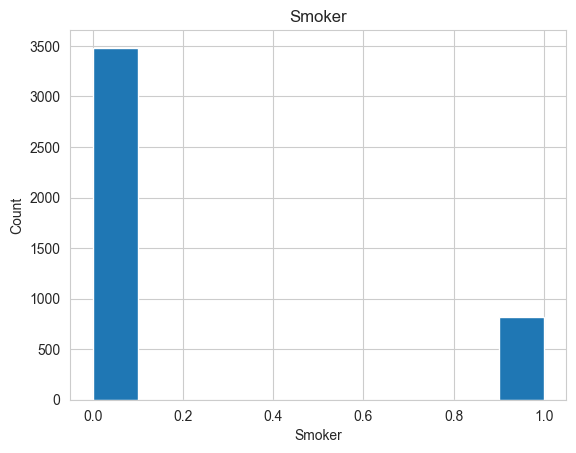

In [34]:
do_hist_plot(filtered_patient_data, 'Smoker')

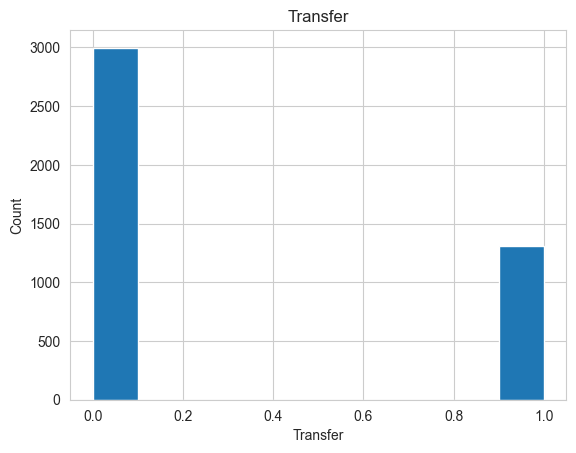

In [35]:
do_hist_plot(filtered_patient_data, 'Transfer')

count    4305.000000
mean        2.099462
std         5.170764
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        94.000000
Name: RBC_pre_ICU, dtype: float64


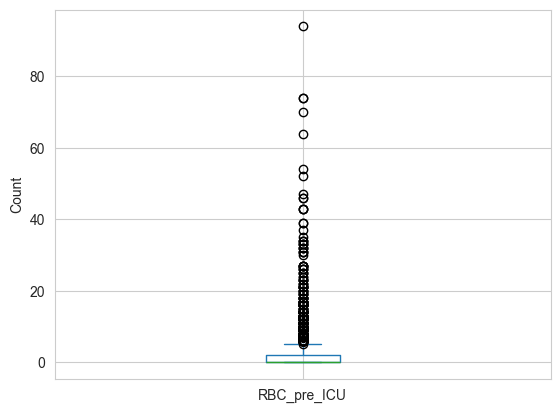

In [36]:
do_box_plot(filtered_patient_data, 'RBC_pre_ICU')

count    4305.000000
mean        1.801869
std         5.173642
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        94.040000
Name: FFP_pre_ICU, dtype: float64


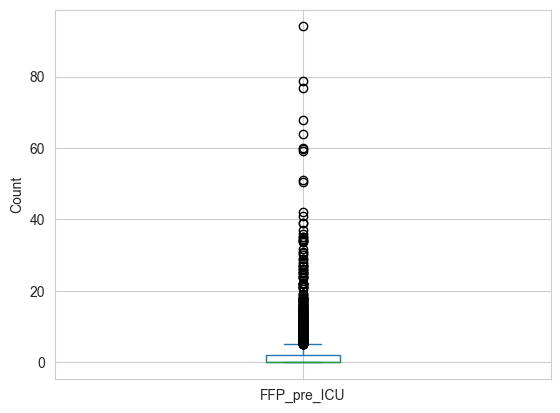

In [37]:
do_box_plot(filtered_patient_data, 'FFP_pre_ICU')

count    4305.000000
mean        0.297731
std         0.876278
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.384000
Name: PLT_pre_ICU, dtype: float64


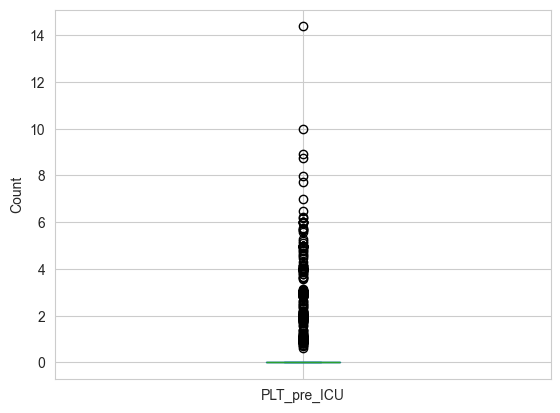

In [38]:
do_box_plot(filtered_patient_data, 'PLT_pre_ICU')

count    4305.000000
mean        4.427178
std         3.076669
min         2.000000
25%         2.600000
50%         3.400000
75%         5.000000
max        29.000000
Name: InitLactate, dtype: float64


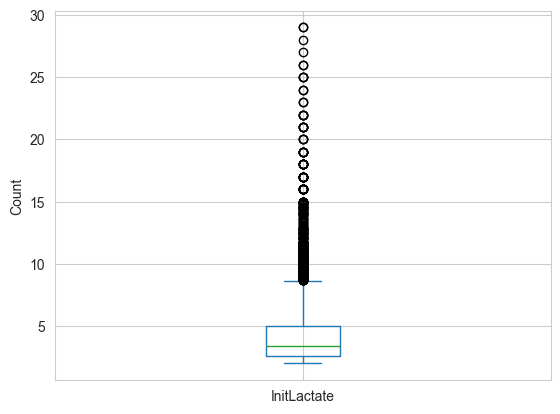

In [39]:
do_box_plot(filtered_patient_data, 'InitLactate')

count    4305.000000
mean        3.346132
std         2.220582
min         0.500000
25%         2.100000
50%         2.900000
75%         3.900000
max        29.000000
Name: lactate_value_ICU, dtype: float64


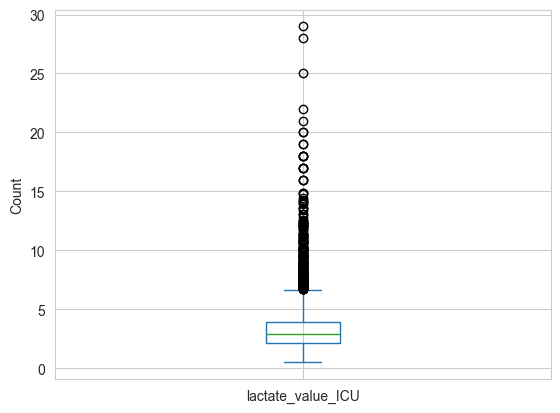

In [40]:
do_box_plot(filtered_patient_data, 'lactate_value_ICU')

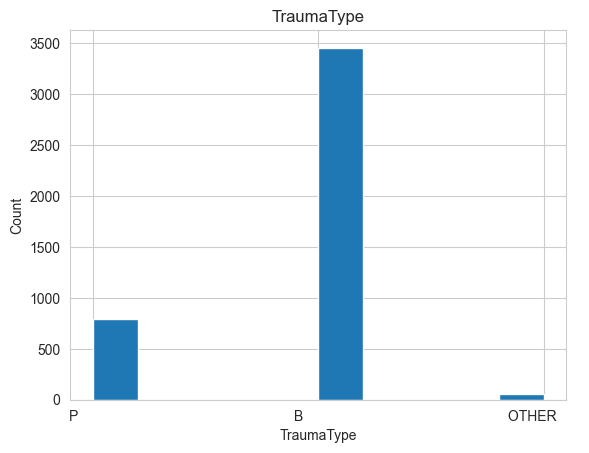

In [41]:
do_hist_plot(filtered_patient_data, 'TraumaType')

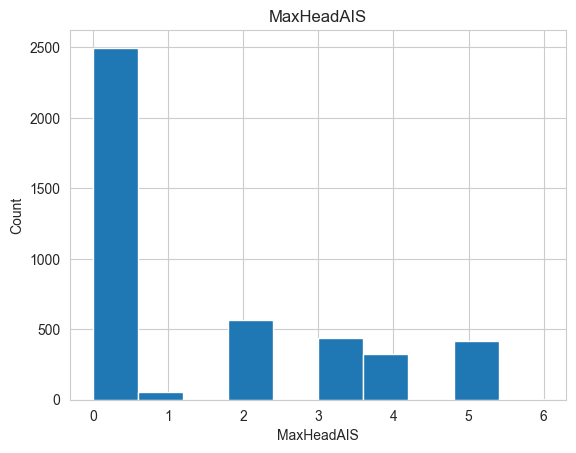

In [42]:
do_hist_plot(filtered_patient_data, 'MaxHeadAIS')

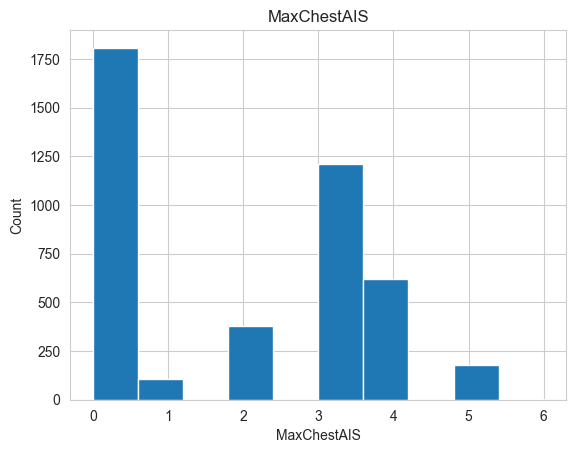

In [43]:
do_hist_plot(filtered_patient_data, 'MaxChestAIS')

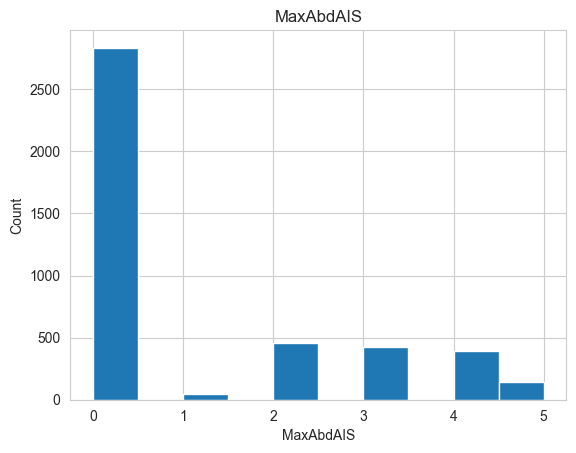

In [44]:
do_hist_plot(filtered_patient_data, 'MaxAbdAIS')

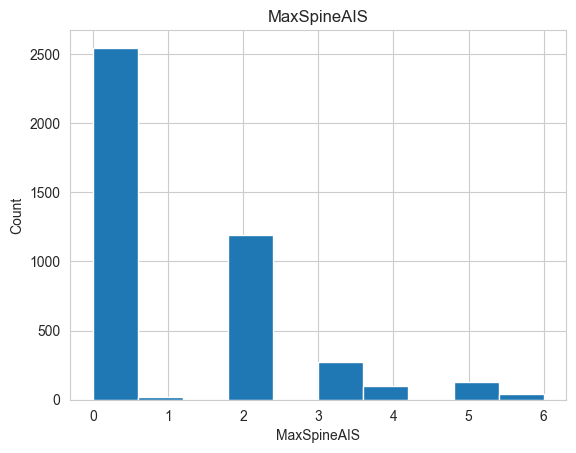

In [45]:
do_hist_plot(filtered_patient_data, 'MaxSpineAIS')

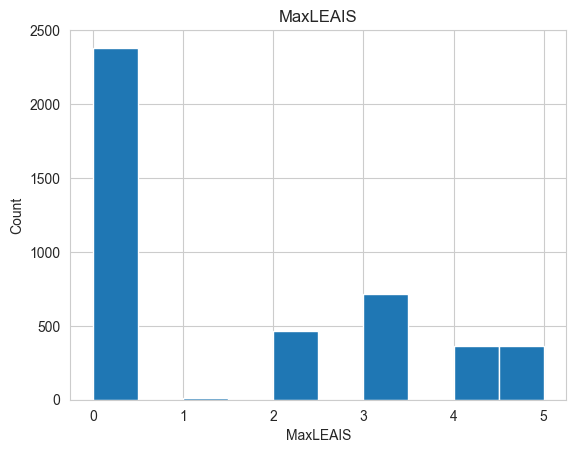

In [46]:
do_hist_plot(filtered_patient_data, 'MaxLEAIS')

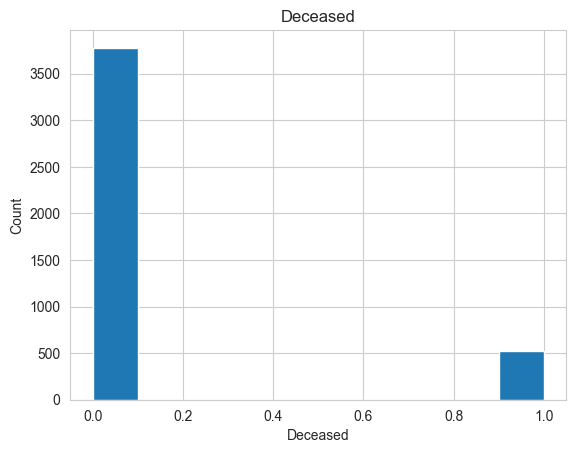

In [47]:
do_hist_plot(filtered_patient_data, 'Deceased')

# Correct BMI

Dr. Beni believes Height is the only issue with the BMI calculations. The outliers need to be addressed.

count    4055.000000
mean      174.707941
std        11.794901
min        66.000000
25%       168.000000
50%       176.000000
75%       182.000000
max       449.000000
Name: Height, dtype: float64


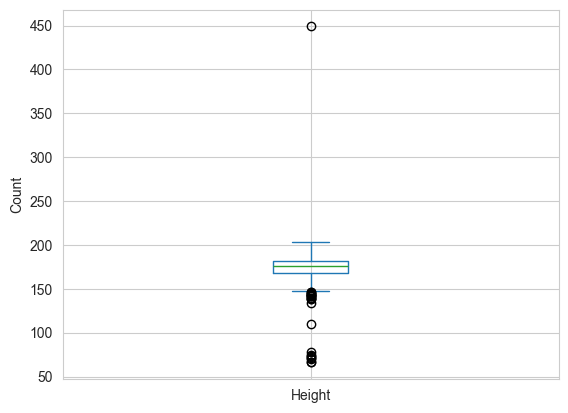

In [48]:
do_box_plot(filtered_patient_data, 'Height')

In [49]:
# 300 cm is almost 10 feet - mark these patient heights as unknown 
filtered_patient_data.loc[filtered_patient_data['Height'] >= 300, 'Height'] = np.nan

In [50]:
# these appear to be in inches - convert them to cm
filtered_patient_data[filtered_patient_data['Height'] < 100]['Height']

1542    66.0
2642    74.0
3486    78.0
4018    70.0
4278    66.0
5115    72.0
5148    73.0
5634    71.0
Name: Height, dtype: float64

In [51]:
filtered_patient_data.loc[filtered_patient_data['Height'] < 100, 'Height'] = filtered_patient_data.loc[filtered_patient_data['Height'] < 100, 'Height'].apply(lambda h: h * 2.54)

count    4054.000000
mean      174.856808
std         9.983577
min       110.000000
25%       168.000000
50%       176.000000
75%       182.000000
max       203.000000
Name: Height, dtype: float64


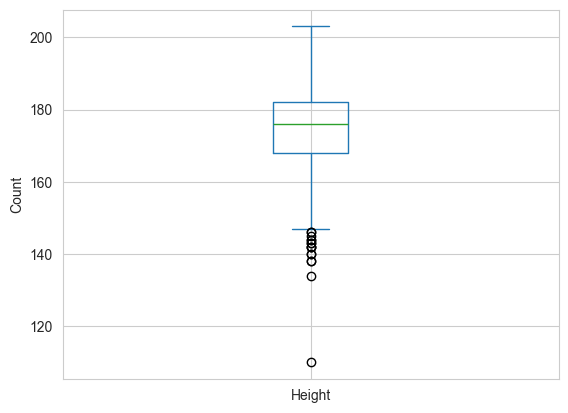

In [52]:
do_box_plot(filtered_patient_data, 'Height')

<Axes: >

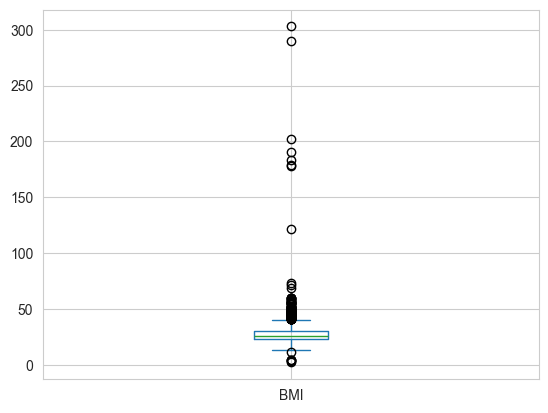

In [53]:
filtered_patient_data['BMI'].plot.box()

count    4031.000000
mean       27.462558
std         6.158779
min         2.808163
25%        23.306680
50%        26.448980
75%        30.453741
max        73.437500
Name: Corrected_BMI, dtype: float64


<Axes: >

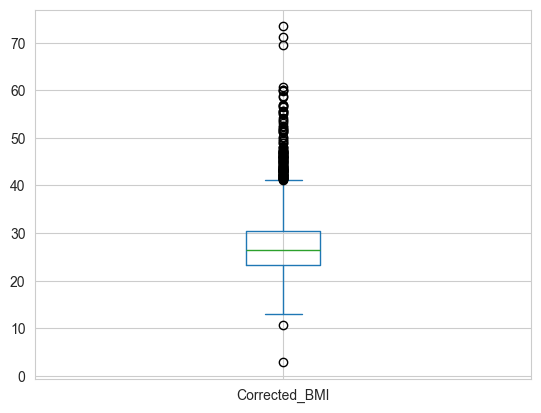

In [54]:
# update BMI
filtered_patient_data['Corrected_BMI'] = filtered_patient_data[['Height', 'Weight']].apply(lambda h_w_tup: 10000 * h_w_tup['Weight'] / np.power(h_w_tup['Height'], 2), axis=1)
print(filtered_patient_data['Corrected_BMI'].describe())
filtered_patient_data['Corrected_BMI'].plot.box()

In [55]:
filtered_patient_data.loc[filtered_patient_data['Corrected_BMI'] > 100, ['Height', 'Weight', 'BMI']]

,Height,Weight,BMI


In [56]:
# Reload data for Dr. O'Keefe's Statistics Request
pd.concat([compiled_patient_data_2012_2015['Race'], compiled_patient_data_2016_2019['Race']]).value_counts()

Race
W                                                                              1735
W                                                                              1272
BL                                                                              281
NOT                                                                             237
BL                                                                              204
A                                                                               155
A                                                                               106
NOT                                                                              92
NAT                                                                              85
NAT                                                                              70
P                                                                                32
O                                                                      

In [57]:
pd.concat([compiled_patient_data_2012_2015['Race'], compiled_patient_data_2016_2019['Race']]).isna().sum()

0

In [58]:
pd.concat([compiled_patient_data_2012_2015['ISS'], compiled_patient_data_2016_2019['ISS']]).describe()

count    4305.000000
mean       24.717305
std        15.493515
min         0.000000
25%        14.000000
50%        22.000000
75%        34.000000
max        75.000000
Name: ISS, dtype: float64

In [59]:
pd.concat([compiled_patient_data_2012_2015['ISS'], compiled_patient_data_2016_2019['ISS']]).isna().sum()

0

In [60]:
pd.concat([compiled_patient_data_2012_2015['MaxNeckAIS'], compiled_patient_data_2016_2019['MaxNeckAIS']]).value_counts()

MaxNeckAIS
0    3819
3     262
2     160
4      43
5      14
1       7
Name: count, dtype: int64

In [61]:
compiled_patient_data_2012_2015.shape[0] + compiled_patient_data_2016_2019.shape[0]

4305

In [62]:
filtered_patient_data['Age'].describe()

count    4305.000000
mean       44.552381
std        18.746787
min        18.000000
25%        28.000000
50%        43.000000
75%        58.000000
max       101.000000
Name: Age, dtype: float64

In [63]:
filtered_patient_data['Corrected_BMI'].describe()

count    4031.000000
mean       27.462558
std         6.158779
min         2.808163
25%        23.306680
50%        26.448980
75%        30.453741
max        73.437500
Name: Corrected_BMI, dtype: float64

In [64]:
(filtered_patient_data['StudyID'] == pd.concat([compiled_patient_data_2012_2015['StudyID'], compiled_patient_data_2016_2019['StudyID']])).all()

True

In [65]:
filtered_patient_data['StudyID'].to_csv('<path_to_temp>/filtered_study_ids.csv', index=False)

In [66]:
unique_data_points = set()
unique_data_points.update(pd.read_csv('<path_to_dataset>/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv').columns)
unique_data_points.update(pd.read_csv('<path_to_dataset>/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv').columns)
unique_data_points.update({
    'FiO2',
    'Creatinine',
    'DBP',
    'HCO3',
    'hgb',
    'UOP',
    'HR',
    'INR',
    'IVF',
    'lactate',
    'MAP',
    'PaCO2',
    'PaO2',
    'pH',
    'Vassopressors',
    'RR',
    'SBP',
    'SpO2',
    'Temp',
})
unique_data_points

/var/folders/vf/695131157rl2pvb9_s5zykbh0000gn/T/ipykernel_55698/2843372351.py:2: DtypeWarning: Columns (1,2,133) have mixed types. Specify dtype option on import or set low_memory=False.
  unique_data_points.update(pd.read_csv('/Users/larry/Documents/UWT/Thesis Work/rec_sys/datasets/trauma_icu_resuscitation/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv').columns)
/var/folders/vf/695131157rl2pvb9_s5zykbh0000gn/T/ipykernel_55698/2843372351.py:3: DtypeWarning: Columns (1,2,133) have mixed types. Specify dtype option on import or set low_memory=False.
  unique_data_points.update(pd.read_csv('/Users/larry/Documents/UWT/Thesis Work/rec_sys/datasets/trauma_icu_resuscitation/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv').columns)


{'AKI_Durations',
 'AKI_Flag',
 'AKI_High_Cr_flag',
 'AKI_Max_Cr',
 'AKI_Number',
 'AKI_Offsets',
 'AKI_Oliguria_flag',
 'AKI_Onset_hours',
 'AKI_Onsets',
 'AKI_Ref_Cr',
 'AKI_Stages',
 'AKI_Worst_Stage',
 'AKI_hours_nan',
 'AKIv2',
 'ARDS',
 'ARDS_P_to_F',
 'AbdAIS',
 'AdmitDtTm',
 'Admit_Year',
 'Age',
 'Alive_no_norm_lactate',
 'Any_FFP_ICU',
 'Any_PLT_ICU',
 'Any_RBC_ICU',
 'Any_blood_ICU',
 'Ascites',
 'BMI',
 'BUN_DtTm_ICU',
 'BUN_DtTm_ICU_48',
 'BUN_DtTm_lactate2',
 'BUN_hrs_btwn_ICU',
 'BUN_hrs_btwn_ICU_48',
 'BUN_hrs_btwn_lactate2',
 'BUN_value_ICU',
 'BUN_value_ICU_48',
 'BUN_value_lactate2',
 'Blunt',
 'CHF',
 'CKD',
 'COPD',
 'CVA',
 'CauseOfDeath',
 'Censored',
 'ChestAIS',
 'Cirrhosis',
 'Coagulopathy',
 'Cohort',
 'Cohort_ED_OR_or_blood',
 'Cohort_ED_blood',
 'Cohort_ED_blood_ICU_L_over_2',
 'Cohort_ICU_L_over_2',
 'Cohort_ICU_L_over_4',
 'Cohort_L_over_4',
 'Complications',
 'Creatinine',
 'Creatinine_DtTm_ICU',
 'Creatinine_DtTm_ICU_48',
 'Creatinine_DtTm_lactate2',
 '

In [67]:
target_cols = {
    'StudyID',
    'Age',
    'Sex',
    'Transfer',
    'ER_Dispo',
    'Dispo_pattern',
    'TraumaType',
    'Penetrating',
    'InjuryMechanism',
    'ISS',
    'MaxHeadAIS',
    'MaxFaceAIS',
    'MaxNeckAIS',
    'MaxChestAIS',
    'MaxAbdAIS',
    'MaxSpineAIS',
    'MaxUEAIS',
    'MaxLEAIS',
    'MaxExtAIS',
    'ExLap',
    'MTP',
    'InitLactate',
    'Hours_from_initial_lactate_to_lactate2',
    'Hours_from_ICU_to_lactate2',
    'Hours_from_initial_lactate_to_ICU',
    'Hosp_LOS',
    'ICU_LOS',
    'VentDays',
    'Deceased',
    'CauseOfDeath',
    'Hours_to_death',
    'DischargeDtTm',
    'Cohort',
    'EarlyDeath',
    'HeadAIS',
    'FaceAIS',
    'NeckAIS',
    'ChestAIS',
    'AbdAIS',
    'SpineAIS',
    'UEAIS',
    'LEAIS',
    'ExtAIS',
    'Any_RBC_ICU',
    'Any_FFP_ICU',
    'Any_PLT_ICU',
    'ER_Dispo_OR',
    'OR_returns_NEW',
    'Home_dc',
    'VentFreeDays',
    'ICUFreeDays',
    'Admit_Year',
    'Home_dc_NEW',
    'Pressors_lactate2',
    'Pressors_ICU',
    'Pressors_ICU_48',
    'Pressors_used',
    'ARDS',
    'ARDS_P_to_F',
    'AKI_hours_nan',
    'Severe_AKI',
    'Cohort_ICU_L_over_2',
    'Cohort_ED_OR_or_blood',
    'Cohort_ED_blood',
    'Cohort_ED_blood_ICU_L_over_2',
    'Cohort_L_over_4',
    'Cohort_ICU_L_over_4',
    'IVF_in_ICU',
    'IVF_before_hr_24_no_L_cutoff',
    'IVF_before_hr_48_no_L_cutoff',
    'Hours_to_last_0.5L_bolus_no_L_cutoff',
    'Num_0.5L_boluses_before_hr_0_no_L_cutoff',
    'Prop_0.5L_boluses_before_hr_0_no_L_cutoff',
    'IVF_before_hr_0_no_L_cutoff',
    'Num_0.5L_boluses_before_hr_2_no_L_cutoff',
    'Prop_0.5L_boluses_before_hr_2_no_L_cutoff',
    'IVF_before_hr_2_no_L_cutoff',
    'Num_0.5L_boluses_before_hr_4_no_L_cutoff',
    'Prop_0.5L_boluses_before_hr_4_no_L_cutoff',
    'IVF_before_hr_4_no_L_cutoff',
    'Num_0.5L_boluses_before_hr_6_no_L_cutoff',
    'Prop_0.5L_boluses_before_hr_6_no_L_cutoff',
    'IVF_before_hr_6_no_L_cutoff',
    'Num_0.5L_boluses_before_hr_12_no_L_cutoff',
    'Prop_0.5L_boluses_before_hr_12_no_L_cutoff',
    'IVF_before_hr_12_no_L_cutoff',
    'Num_0.5L_boluses_before_hr_24_no_L_cutoff',
    'Prop_0.5L_boluses_before_hr_24_no_L_cutoff',
    'Num_0.5L_boluses_before_hr_48_no_L_cutoff',
    'Prop_0.5L_boluses_before_hr_48_no_L_cutoff',
    'Hours_to_last_1.0L_bolus_no_L_cutoff',
    'Num_1.0L_boluses_before_hr_0_no_L_cutoff',
    'Prop_1.0L_boluses_before_hr_0_no_L_cutoff',
    'Num_1.0L_boluses_before_hr_2_no_L_cutoff',
    'Prop_1.0L_boluses_before_hr_2_no_L_cutoff',
    'Num_1.0L_boluses_before_hr_4_no_L_cutoff',
    'Prop_1.0L_boluses_before_hr_4_no_L_cutoff',
    'Num_1.0L_boluses_before_hr_6_no_L_cutoff',
    'Prop_1.0L_boluses_before_hr_6_no_L_cutoff',
    'Num_1.0L_boluses_before_hr_12_no_L_cutoff',
    'Prop_1.0L_boluses_before_hr_12_no_L_cutoff',
    'Num_1.0L_boluses_before_hr_24_no_L_cutoff',
    'Prop_1.0L_boluses_before_hr_24_no_L_cutoff',
    'Num_1.0L_boluses_before_hr_48_no_L_cutoff',
    'Prop_1.0L_boluses_before_hr_48_no_L_cutoff',
    'RBC_pre_ICU',
    'RBC_ICU_before_L2',
    'RBC_ICU',
    'RBC_pre_ICU_OR',
    'RBC_pre_ICU_ED',
    'RBC_ICU_OR',
    'RBC_OR',
    'PLT_pre_ICU',
    'PLT_ICU_before_L2',
    'PLT_ICU',
    'PLT_pre_ICU_OR',
    'PLT_pre_ICU_ED',
    'PLT_ICU_OR',
    'PLT_OR',
    'FFP_pre_ICU',
    'FFP_ICU_before_L2',
    'FFP_ICU',
    'FFP_pre_ICU_OR',
    'FFP_pre_ICU_ED',
    'FFP_ICU_OR',
    'FFP_OR',
    'CRYO_pre_ICU',
    'CRYO_ICU_before_L2',
    'CRYO_ICU',
    'CRYO_pre_ICU_OR',
    'CRYO_pre_ICU_ED',
    'CRYO_ICU_OR',
    'CRYO_OR',
    'WB_pre_ICU',
    'WB_ICU_before_L2',
    'WB_ICU',
    'WB_pre_ICU_OR',
    'WB_pre_ICU_ED',
    'WB_ICU_OR',
    'WB_OR',
    'Blunt',
    'Num_0.5L_boluses_after_hr_24_before_hr_48_no_L_cutoff',
    'IVF_after_hr_24_before_hr_48_no_L_cutoff',
    'Any_blood_ICU',
    'Hours_to_death_from_admit',
    'Death_after_48_hrs',
    'Death_by_3_hrs',
    'Death_by_24_hrs',
    'Death_by_48_hrs',
    'EarlyBolus_NEW',
    'Num_0.5L_boluses_after_hr_6_before_hr_48_no_L_cutoff',
    'LateBolus_NEW',
    'EarlyLateBolus_NEW',
}

dset_zero_df = pd.read_csv('<path_to_dataset>/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')
dset_one_df = pd.read_csv('<path_to_dataset>/2016-2019_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')

/var/folders/vf/695131157rl2pvb9_s5zykbh0000gn/T/ipykernel_55698/1906398783.py:157: DtypeWarning: Columns (1,2,133) have mixed types. Specify dtype option on import or set low_memory=False.
  dset_zero_df = pd.read_csv('/Users/larry/Documents/UWT/Thesis Work/rec_sys/datasets/trauma_icu_resuscitation/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')


In [68]:
len(set(dset_zero_df.columns).intersection(set(dset_one_df.columns)))

284

In [69]:
len(set(dset_zero_df.columns).intersection(set(dset_one_df.columns)).intersection(target_cols))

130

In [70]:
real_cols_to_use = set(dset_zero_df.columns).intersection(set(dset_one_df.columns)).intersection(target_cols)
# move StudyID to the front
real_cols_to_use.remove('StudyID')
real_cols_to_use = list(real_cols_to_use)
real_cols_to_use.insert(0, 'StudyID')
filtered_dset_zero_df = dset_zero_df[real_cols_to_use]
filtered_dset_one_df = dset_one_df[real_cols_to_use]
combined_dset_df = pd.concat([filtered_dset_zero_df, filtered_dset_one_df])
combined_dset_df.head()

,StudyID,ICU_LOS,ExLap,Prop_0.5L_boluses_before_hr_0_no_L_cutoff,MaxUEAIS,Cohort_ICU_L_over_4,ChestAIS,Num_1.0L_boluses_before_hr_48_no_L_cutoff,Hours_from_ICU_to_lactate2,Hours_to_death,...,Num_0.5L_boluses_after_hr_6_before_hr_48_no_L_cutoff,Prop_1.0L_boluses_before_hr_0_no_L_cutoff,FFP_pre_ICU_ED,Home_dc,MaxChestAIS,MTP,AKI_hours_nan,Num_0.5L_boluses_before_hr_12_no_L_cutoff,MaxSpineAIS,Hours_to_death_from_admit
0,19334.0,1.0,0,0.0,0,0,0,0.0,NaN,NaN,...,0.0,0.0,0.000,0,0,0,NaN,0.0,0,NaN
1,18608.0,2.0,0,0.0,0,1,0,1.0,NaN,NaN,...,2.0,0.0,2.292,0,0,0,NaN,4.0,0,NaN
2,20425.0,2.0,0,0.0,0,0,0,0.0,NaN,NaN,...,0.0,0.0,0.000,1,0,0,NaN,0.0,1,NaN
3,19690.0,9.0,0,0.0,2,0,0,1.0,NaN,182.63,...,0.0,0.0,0.780,0,0,0,NaN,2.0,0,186.77
4,20636.0,5.0,0,0.0,0,0,0,0.0,-0.98,NaN,...,0.0,0.0,0.000,1,0,0,NaN,0.0,0,NaN


In [71]:
combined_dset_df.to_csv('<path_to_temp>/combined_dset_df.csv', index=False)

In [72]:
# dataset for blake
blake_2015_df = pd.read_csv('<path_to_dataset>/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')
blake_2015_df = filter_data(blake_2015_df)
blake_2015_df.to_csv('<path_to_temp>/blake_2015_df.csv', index=False)
blake_2019_df = pd.read_csv('<path_to_dataset>/2016-2019_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')
blake_2019_df = filter_data(blake_2019_df)
blake_2019_df.to_csv('<path_to_temp>/blake_2019_df.csv', index=False)

/var/folders/vf/695131157rl2pvb9_s5zykbh0000gn/T/ipykernel_55698/1414174507.py:2: DtypeWarning: Columns (1,2,133) have mixed types. Specify dtype option on import or set low_memory=False.
  blake_2015_df = pd.read_csv('/Users/larry/Documents/UWT/Thesis Work/rec_sys/datasets/trauma_icu_resuscitation/2012-2015_compiled_patient_data_with_cohorts_no_L_required_new_IVF_EarlyLateBolus.csv')
